Model Accuracy: 0.94
Classification Report:
                   precision    recall  f1-score   support

Correct placement       0.89      1.00      0.94        16
Invalid placement       1.00      0.87      0.93        15

         accuracy                           0.94        31
        macro avg       0.94      0.93      0.93        31
     weighted avg       0.94      0.94      0.94        31



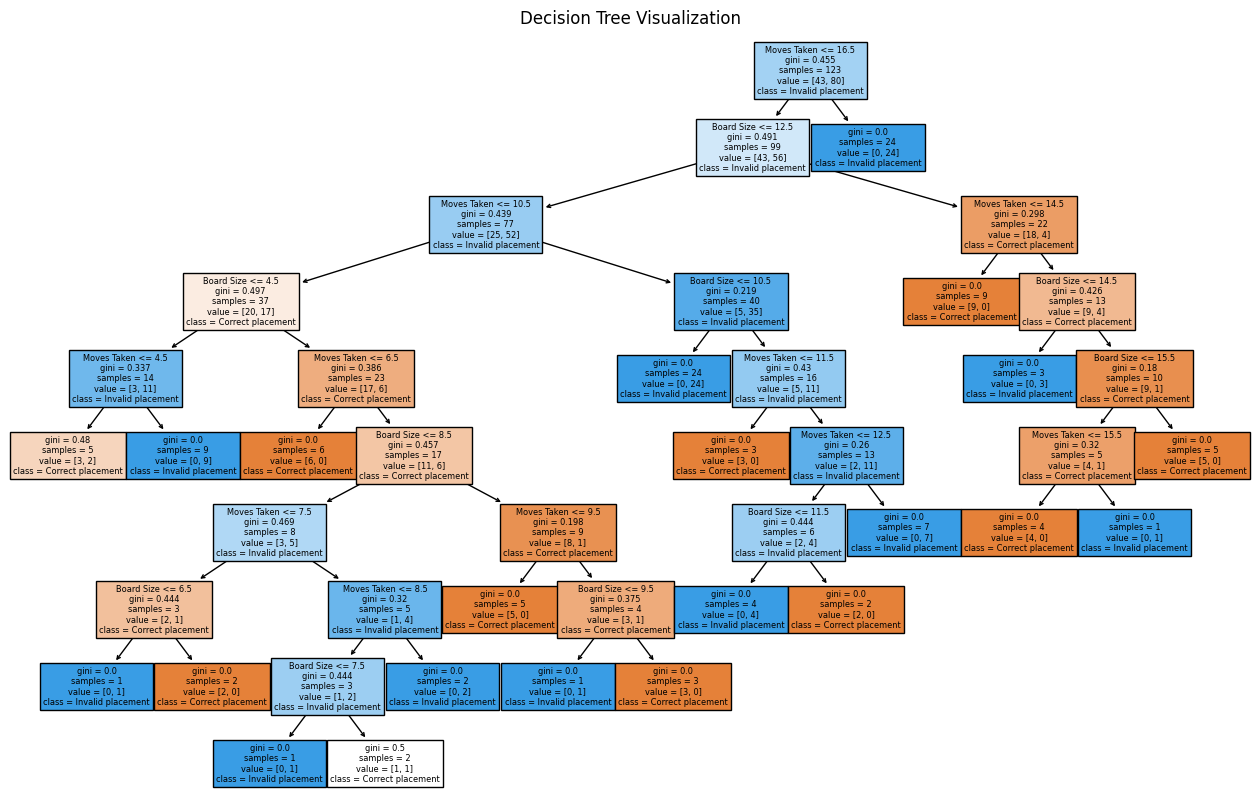

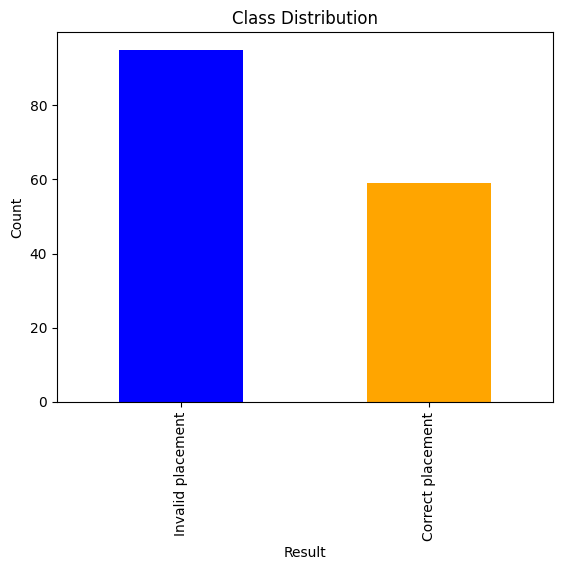

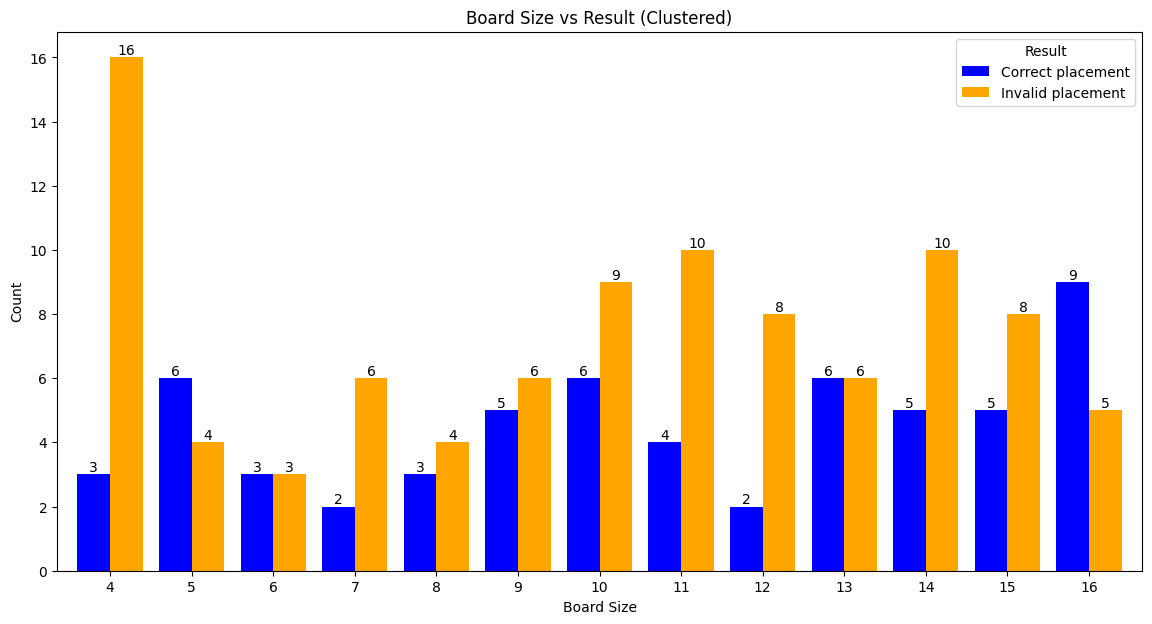


10 next Predictions:
 Board Size  Moves Taken  Predicted Result
         15           20 Invalid placement
          6            9 Invalid placement
         12           12 Correct placement
          9            9 Correct placement
          7           12 Invalid placement
          4            4 Correct placement
         11           11 Correct placement
         12           16 Invalid placement
         15           21 Invalid placement
         10           15 Invalid placement


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.tree import plot_tree


file_path = "C:/Users/ashwi/Downloads/NQueens.csv" 
data = pd.read_csv(file_path)


def generate_nqueens_data(num_samples=100, max_board_size=16):
    new_data = []
    for _ in range(num_samples):
        board_size = np.random.randint(4, max_board_size + 1)
        optimal_moves = board_size
        moves_taken = optimal_moves + np.random.randint(-3, 8)
        moves_taken = max(moves_taken, optimal_moves)
        result = "Correct placement" if moves_taken == optimal_moves else "Invalid placement"
        timestamp = pd.Timestamp.now()
        new_data.append([timestamp, board_size, moves_taken, result])
    return pd.DataFrame(new_data, columns=["Timestamp", "Board Size", "Moves Taken", "Result"])


additional_data = generate_nqueens_data(150)
augmented_data = pd.concat([data, additional_data], ignore_index=True)


X = augmented_data[["Board Size", "Moves Taken"]]
y = augmented_data["Result"]


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)


y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Model Accuracy: {accuracy:.2f}")
print("Classification Report:")
print(report)


plt.figure(figsize=(16, 10))
plot_tree(model, feature_names=["Board Size", "Moves Taken"], class_names=model.classes_, filled=True)
plt.title("Decision Tree Visualization")
plt.show()


augmented_data["Result"].value_counts().plot(kind='bar', color=['blue', 'orange'])
plt.title("Class Distribution")
plt.xlabel("Result")
plt.ylabel("Count")
plt.show()


board_size_result = augmented_data.groupby(["Board Size", "Result"]).size().unstack(fill_value=0)

ax = board_size_result.plot(kind='bar', figsize=(14, 7), color=['blue', 'orange'], width=0.8)
plt.title("Board Size vs Result (Clustered)")
plt.xlabel("Board Size")
plt.ylabel("Count")
plt.legend(title="Result")
plt.xticks(rotation=0)


for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2, p.get_height()), 
                ha='center', va='bottom', fontsize=10)

plt.show()


new_samples = generate_nqueens_data(10)
new_predictions = model.predict(new_samples[["Board Size", "Moves Taken"]])
new_samples["Predicted Result"] = new_predictions
print("\n10 next Predictions:")
print(new_samples[["Board Size", "Moves Taken", "Predicted Result"]].to_string(index=False))
